In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 1.0MB 13.0MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 358kB 33.2MB/s 
     |████████████████████████████████| 92kB 11.2MB/s 
     |████████████████████████████████| 40kB 4.4MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 2.6MB 29.8MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
········

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)


In [7]:
Path.BASE_PATH = path

In [4]:
path

Path('/root/.fastai/data/mnist_png')

In [8]:
(path/'training').ls()

(#10) [Path('training/9'),Path('training/8'),Path('training/4'),Path('training/5'),Path('training/0'),Path('training/3'),Path('training/6'),Path('training/1'),Path('training/2'),Path('training/7')]

In [11]:
dls = ImageDataLoaders.from_folder(path,train='training',valid_pct=0.2)

In [50]:
learn = cnn_learner(dls, resnet18, pretrained=False,  metrics=accuracy)
learn.fit_one_cycle(5, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.291180,64.998863,0.675643,01:06
1,1.065000,29.318455,0.951500,01:04
2,0.466738,4.582569,0.974643,01:03
3,0.097399,0.061629,0.987714,01:03
4,0.024069,38.874355,0.992214,01:02


# Other nb

In [42]:
import os
import shutil
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz
from zipfile import ZipFile
from tempfile import TemporaryFile

import cv2
from google.colab.patches import cv2_imshow
import imutils
from scipy.optimize import minimize_scalar

from sklearn.metrics import f1_score, accuracy_score

# plot options
# plt.rcParams.update({'font.size': 11})
# plt.style.use('fivethirtyeight')
# plt.style.use('default')

In [26]:
os.mkdir('/content/sample_data/testims')

In [16]:
mount_path = '/content/gdrive/'
# Set and test path to competition data files
competition_path = 'My Drive/AI For Good - AI Blitz 3/Sudoku/Data/'

filename = 'train.tar.gz'
assert(os.path.exists(f'{mount_path}/{competition_path}/train.tar.gz'))
print('Drive mounted correctly and data accessible')

Drive mounted correctly and data accessible


In [17]:
# this can take a bit (maybe 30s)
# All_Data is the home directory for the images, from which training and validation splits will be taken
if not os.path.exists('/content/All_Data/'):
  os.mkdir('/content/All_Data/')
  shutil.unpack_archive(f'{mount_path}/{competition_path}/train.tar.gz','/content/All_Data/')

In [18]:
imgs=glob.glob('/content/All_Data/train/images/*.png')

In [19]:
def sqdif(bingray,sq,ang):
  rsq=imutils.resize(imutils.rotate_bound(sq,ang),width=imsz,height=imsz)

  return np.sum(np.abs(bingray-rsq))


def derotate(img):
  sq=np.ones(img.shape)*255

  # binarize by blurring then using Otsu's method
  # blur=cv2.GaussianBlur(gray,(1,1),0)
  _,bingray = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  rotang=minimize_scalar(lambda ang: sqdif(bingray,sq,ang),
                         bounds=[-45,45], method='Bounded').x

  if rotang<0:
    triang=np.tan(np.pi/4+rotang*np.pi/180)
    act_x=imsz/2*(1+triang)
    act_y=imsz/2*(1-triang)

    pts1 = np.float32([[0,act_y],[act_x,0],[imsz-act_x,imsz],[imsz,imsz-act_y]])

  else:
    triang=np.tan(np.pi/4-rotang*np.pi/180)
    act_x=imsz/2*(1-triang)
    act_y=imsz/2*(1+triang)

    pts1 = np.float32([[act_x,0],[imsz,imsz-act_y],[0,act_y],[imsz-act_x,imsz]])

  pts2 = np.float32([[0,0],[imsz,0],[0,imsz],[imsz,imsz]])
  M = cv2.getPerspectiveTransform(pts1,pts2)
  return cv2.warpPerspective(img,M,(imsz,imsz))

/content/All_Data/train/images/3044.png


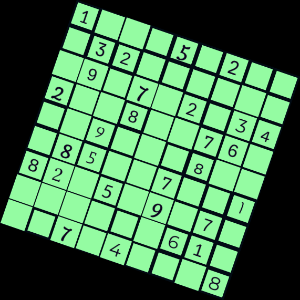

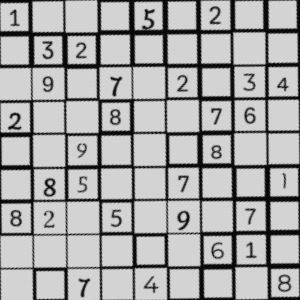

In [20]:
impath=np.random.choice(imgs)
print(impath)
img=cv2.imread(impath)
cv2_imshow(img)

# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imsz = gray.shape[0]


img=derotate(gray)

cv2_imshow(img)


In [21]:
subimgs={}
for rowind in range(9):
  for colind in range(9):
    subimgs[rowind,colind]=img[(rowind*int(imsz/9)):((rowind+1)*int(imsz/9)),
                               (colind*int(imsz/9)):((colind+1)*int(imsz/9))]

    

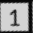

In [55]:
Image.fromarray(subimg)

1


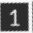

7


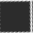

1


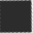

7


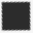

7


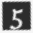

7


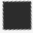

7


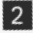

7


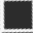

7


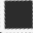

7


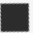

8


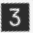

7


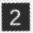

7


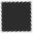

7


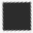

7


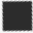

7


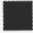

1


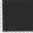

7


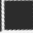

7


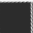

6


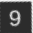

7


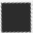

7


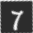

1


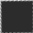

7


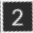

7


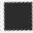

6


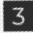

6


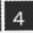

6


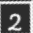

7


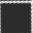

7


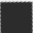

6


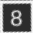

7


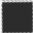

1


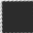

7


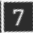

6


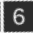

7


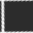

6


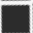

7


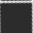

6


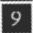

7


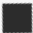

7


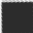

7


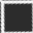

6


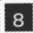

7


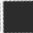

7


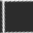

7


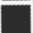

7


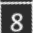

6


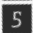

7


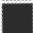

6


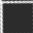

7


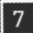

7


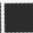

7


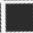

7


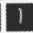

6


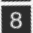

7


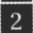

7


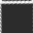

6


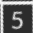

7


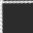

8


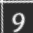

7


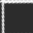

7


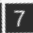

7


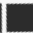

7


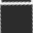

7


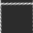

7


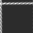

7


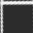

7


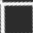

6


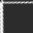

7


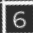

6


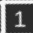

7


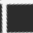

7


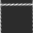

7


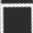

7


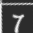

7


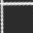

6


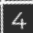

7


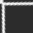

7


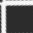

7


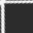

6


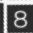

In [60]:
temppath='/content/sample_data/temp.png'

for rowind in range(9):
  for colind in range(9):
    subimg=255-subimgs[rowind,colind]
    cv2.imwrite(temppath,subimg)
    pred=learn.predict(temppath)[0]
    print(pred)
    cv2_imshow(subimg)
                               

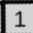

('1',
 tensor(1),
 tensor([0.0137, 0.3135, 0.0249, 0.0077, 0.0515, 0.0283, 0.2248, 0.2372, 0.0633, 0.0351]))

In [51]:
testimg='/content/sample_data/testims/7_7.png'

cv2_imshow(cv2.imread(testimg))
learn.predict(testimg)

In [53]:
fpath='/root/.fastai/data/mnist_png/training/8/9125.png'
temppath='/content/sample_data/temp.png'
shutil.copy2(fpath,temppath,follow_symlinks=False)

cv2_imshow(cv2.imread(temppath))
learn.predict(temppath)

('8',
 tensor(8),
 tensor([2.1100e-11, 2.7077e-12, 1.2787e-10, 1.6671e-11, 9.2559e-13, 1.2360e-11, 1.1278e-11, 6.8570e-13, 1.0000e+00, 9.6181e-10]))

In [36]:
ls /root/.fastai/data/mnist_png/training/8

10001.png  17760.png  25731.png  33481.png  41106.png  48668.png  56235.png
10012.png  17765.png  25736.png  33490.png  41115.png  48684.png  56250.png
10021.png  17768.png  25741.png  33514.png  41118.png  48688.png  56254.png
10041.png  1776.png   25763.png  33517.png  41124.png  48693.png  56255.png
10054.png  1777.png   25766.png  33519.png  41130.png  48704.png  5625.png
10057.png  17784.png  25776.png  33533.png  41132.png  48711.png  56284.png
10061.png  17803.png  2577.png   33539.png  41133.png  48723.png  56286.png
10064.png  17804.png  25796.png  3353.png   41153.png  48726.png  5628.png
10066.png  17808.png  25799.png  33546.png  41154.png  48734.png  56290.png
10079.png  1780.png   25819.png  3354.png   41175.png  48737.png  56295.png
1009.png   17818.png  25835.png  33557.png  41180.png  48739.png  56296.png
10115.png  17825.png  25843.png  33569.png  41183.png  4873.png   56299.png
10124.png  1783.png   25849.png  33570.png  41200.png  48743.png  56307.png
10126.png  178